<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/Descriptive_statistics_SE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install energyquantified


In [7]:
import pandas as pd
import numpy as np
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [10]:
SE1_Spot = EQ.timeseries.load(
   'SE1 Price Spot EUR/MWh NordPool H Actual',
   begin='2015-01-01',
   end='2021-05-31',
   frequency=Frequency.PT1H
)
SE1_Spot = SE1_Spot.to_dataframe()
SE1_Spot

,SE1 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2015-01-01 00:00:00+01:00,27.38
2015-01-01 01:00:00+01:00,23.37
2015-01-01 02:00:00+01:00,19.33
2015-01-01 03:00:00+01:00,17.66
2015-01-01 04:00:00+01:00,17.53
...,...
2021-05-30 19:00:00+02:00,34.54


In [11]:
SE1_Imb = EQ.timeseries.load(
   'SE1 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2015-01-01',
   end='2021-05-31',
   frequency=Frequency.PT1H
)
SE1_Imb = SE1_Imb.to_dataframe()
SE1_Imb

,SE1 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2015-01-01 00:00:00+01:00,21.36
2015-01-01 01:00:00+01:00,30.53
2015-01-01 02:00:00+01:00,30.53
2015-01-01 03:00:00+01:00,29.42
2015-01-01 04:00:00+01:00,28.86
...,...
2021-05-30 19:00:00+02:00,19.00


In [12]:
# SE1_temp_actual = EQ.timeseries.load(
#    'SE1 Consumption Temperature °C H Actual',
#    begin='2015-01-01',
#    end='2021-05-31',
#    frequency=Frequency.PT1H
# ) 
# SE1_temp_actual = SE1_temp_actual.to_dataframe()
# SE1_temp_actual

In [13]:
df_comb = pd.merge(SE1_Spot, SE1_Imb , left_index=True, right_index=True, how='inner')
df_comb

,SE1 Price Spot EUR/MWh NordPool H Actual,SE1 Price Imbalance Consumption EUR/MWh H Actual
,,
,,
date,,
2015-01-01 00:00:00+01:00,27.38,21.36
2015-01-01 01:00:00+01:00,23.37,30.53
2015-01-01 02:00:00+01:00,19.33,30.53
2015-01-01 03:00:00+01:00,17.66,29.42
2015-01-01 04:00:00+01:00,17.53,28.86
...,...,...
2021-05-30 19:00:00+02:00,34.54,19.00


In [14]:
df_comb.columns


MultiIndex([(        'SE1 Price Spot EUR/MWh NordPool H Actual', '', ''),
            ('SE1 Price Imbalance Consumption EUR/MWh H Actual', '', '')],
           )

In [15]:
df_comb['Direction', '', '']= df_comb['SE1 Price Spot EUR/MWh NordPool H Actual',''] - df_comb['SE1 Price Imbalance Consumption EUR/MWh H Actual','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [16]:
df_comb.columns


MultiIndex([(        'SE1 Price Spot EUR/MWh NordPool H Actual', '', ''),
            ('SE1 Price Imbalance Consumption EUR/MWh H Actual', '', ''),
            (                                       'Direction', '', '')],
           )

In [17]:
df_comb

,SE1 Price Spot EUR/MWh NordPool H Actual,SE1 Price Imbalance Consumption EUR/MWh H Actual,Direction
,,,
,,,
date,,,
2015-01-01 00:00:00+01:00,27.38,21.36,6.02
2015-01-01 01:00:00+01:00,23.37,30.53,-7.16
2015-01-01 02:00:00+01:00,19.33,30.53,-11.20
2015-01-01 03:00:00+01:00,17.66,29.42,-11.76
2015-01-01 04:00:00+01:00,17.53,28.86,-11.33
...,...,...,...
2021-05-30 19:00:00+02:00,34.54,19.00,15.54


In [18]:
df_comb.drop(['SE1 Price Spot EUR/MWh NordPool H Actual', 'SE1 Price Imbalance Consumption EUR/MWh H Actual'], axis=1, level=0 ,inplace=True)
df_comb

,Direction
,
,
date,
2015-01-01 00:00:00+01:00,6.02
2015-01-01 01:00:00+01:00,-7.16
2015-01-01 02:00:00+01:00,-11.20
2015-01-01 03:00:00+01:00,-11.76
2015-01-01 04:00:00+01:00,-11.33
...,...
2021-05-30 19:00:00+02:00,15.54


In [19]:
df_comb.describe()

,Direction
,
,
count,56159.000000
mean,1.505437
std,15.062994
min,-1972.580000
25%,-1.010000
50%,0.000000
75%,4.890000
max,1001.770000


In [20]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

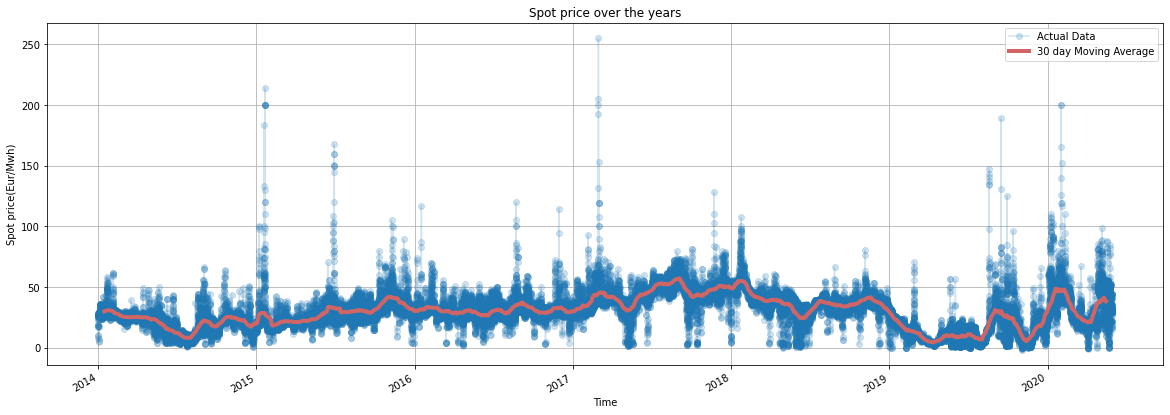

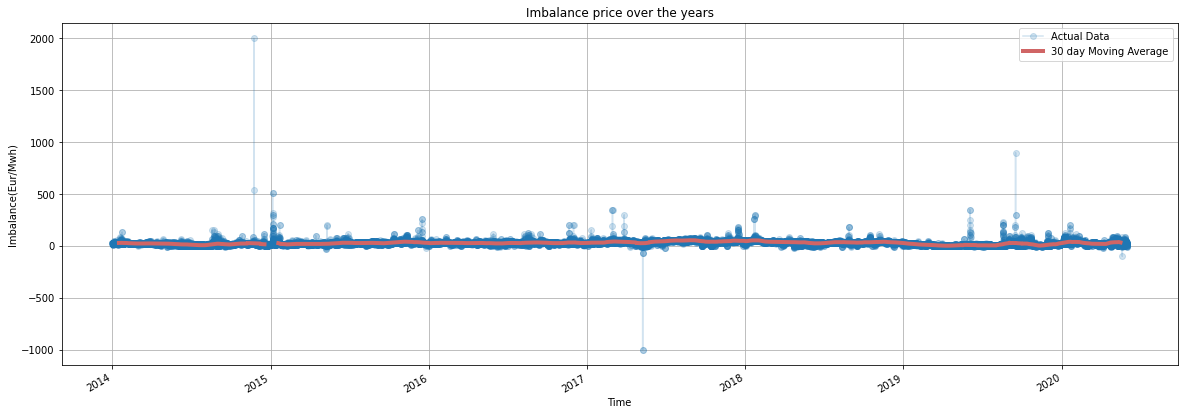

In [21]:
SE1_Spot.plot(figsize=[20,7], alpha=0.2, marker="o")
SE1_Spot.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("Spot price(Eur/Mwh)");
plt.title("Spot price over the years");

SE1_Imb.plot(figsize=[20,7], alpha=0.2, marker="o")
SE1_Imb.rolling(window=30*24, center=True).mean().plot(ax=plt.gca(), color=red, lw=4);
plt.legend(["Actual Data", "30 day Moving Average"])
plt.grid()
plt.xticks(), plt.yticks();
plt.xlabel("Time"), plt.ylabel("Imbalance(Eur/Mwh)");
plt.title("Imbalance price over the years");

In [22]:
SE1_Spot.describe()

,SE1 Price Spot EUR/MWh NordPool H Actual
,
,
count,56207.000000
mean,29.952351
std,14.432698
min,-1.730000
25%,21.300000
50%,29.300000
75%,38.725000
max,255.020000


In [23]:
SE1_Imb.describe()

,SE1 Price Imbalance Consumption EUR/MWh H Actual
,
,
count,56159.000000
mean,28.458594
std,20.285652
min,-1000.000000
25%,18.795000
50%,27.900000
75%,37.020000
max,1999.000000


In [24]:
def getSeason(ActualLoad):
  season=pd.Series()
  
  for year in ActualLoad.index.year.unique():

    yearlySeason = pd.Series("inter-season", index=ActualLoad.loc[str(year)].index)

    yearlySeason.loc[: "{}-2-27".format(year)] ="winter"
    yearlySeason.loc["{}-11-1".format(year):] = "winter"
    yearlySeason.loc["{}-5-1".format(year): "{}-9-30".format(year)]= "summer"

    season=pd.concat([season, yearlySeason])
  return season

In [25]:
season= getSeason(SE1_Spot).rename("season")
print(season)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season, Length: 56207, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [26]:
def plot_daily(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("SE1 Price Spot EUR/MWh NordPool H Actual", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("SE1 Spot Eur/Mwh", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [27]:
def plot_season(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

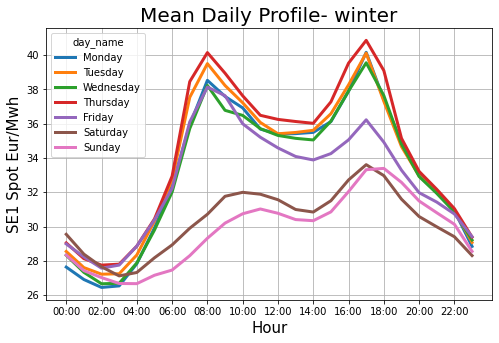

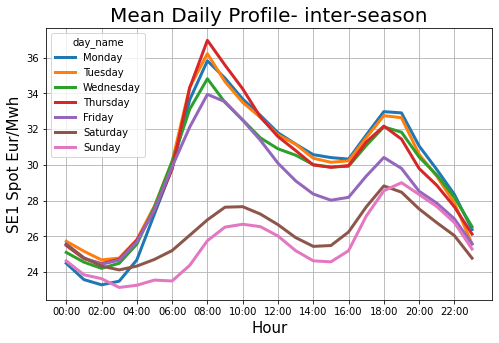

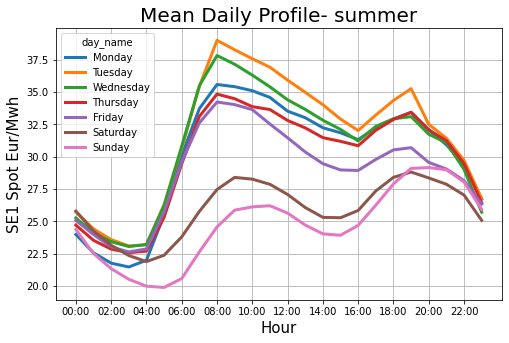

In [28]:
plot_daily(SE1_Spot, seasonStr="winter")
plot_daily(SE1_Spot, seasonStr="inter-season")
plot_daily(SE1_Spot, seasonStr="summer")

In [29]:
season_imb= getSeason(SE1_Imb).rename("season_imb")
print(season_imb)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season_imb, Length: 56207, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [30]:
def plot_daily_Imb(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("SE1 Price Imbalance Consumption EUR/MWh H Actual", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("SE1 Imbalance Eur/Mwh", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [31]:
def plot_season_Imb(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

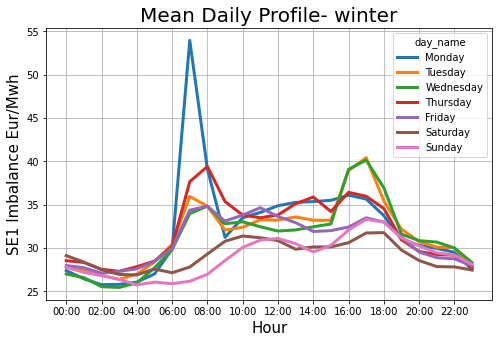

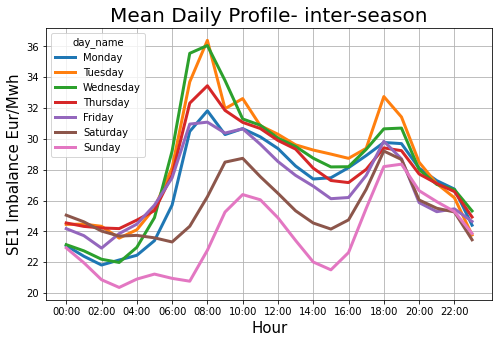

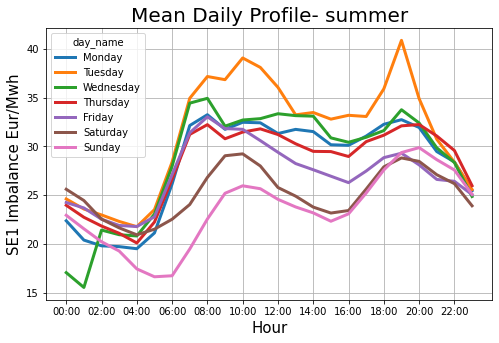

In [32]:
plot_daily_Imb(SE1_Imb, seasonStr="winter")
plot_daily_Imb(SE1_Imb, seasonStr="inter-season")
plot_daily_Imb(SE1_Imb, seasonStr="summer")

In [33]:
season_comb= getSeason(df_comb).rename("season_comb")
print(season_comb)

2015-01-01 00:00:00+01:00    winter
2015-01-01 01:00:00+01:00    winter
2015-01-01 02:00:00+01:00    winter
2015-01-01 03:00:00+01:00    winter
2015-01-01 04:00:00+01:00    winter
                              ...  
2021-05-30 19:00:00+02:00    summer
2021-05-30 20:00:00+02:00    summer
2021-05-30 21:00:00+02:00    summer
2021-05-30 22:00:00+02:00    summer
2021-05-30 23:00:00+02:00    summer
Name: season_comb, Length: 56207, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [34]:
def plot_daily_Comb(ActualLoad, seasonStr):
  xaxis= pd.date_range("2018-8-13", periods=24, freq="1h").strftime("%H:%M")
  fontsize = 15
  df= ActualLoad[season==seasonStr]
  df= df.assign(day_name = df.index.day_name(), hour= df.index.strftime("%H:%M"))

  weekdayName= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

  (df.pivot_table("Direction", index="day_name", columns= "hour")
    .T
    .loc[: , weekdayName]
    .plot(figsize=[8,5],
          lw=3));

  plt.xticks(np.arange(0, len(xaxis), 2), xaxis[::2]);
  plt.xlabel("Hour", fontsize=fontsize)
  plt.ylabel("Spread", fontsize=fontsize);
  plt.grid()
  plt.title("Mean Daily Profile- {}".format(seasonStr), fontsize=fontsize+5);
  plt.ylim(10,23)
  plt.autoscale()

In [35]:
def plot_season_Comb(x,y, xlabel, ylabel, title, freq, s=30):
  df= pd.concat([x,y],axis=1)

  seasons=["winter", "inter-season", "summer"]
  colors= {"winter":blue, "inter-season":grey, "summer":red}

  fig= plt.figure(figsize=[17,5])
  size=12
  alpha=0.5

  for i,seasonStr in enumerate(seasons):

    fig.add_subplot(1, 3, i+1)
    df[season==seasonStr].resample(freq).mean().plot.scatter(ax=plt.gca(), x= x.name, y=y.name, s=s, alpha=alpha, color=colors[seasonStr]);

    plt.grid()
    plt.xlabel(xlabel, size=size)
    plt.ylabel(ylabel, size=size)
    plt.title("{} - {}".format(seasonStr.capitalize(),title), size=size);
    plt.xticks(size=size, rotation=45), plt.yticks(size=size);
    plt.autoscale()
  plt.tight_layout()

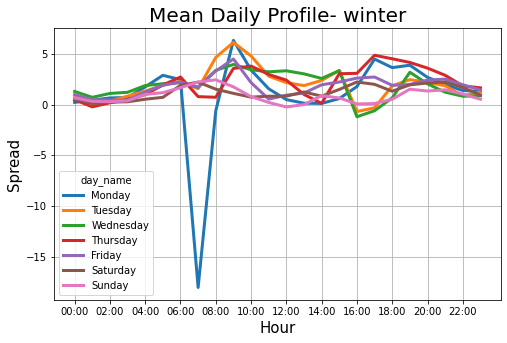

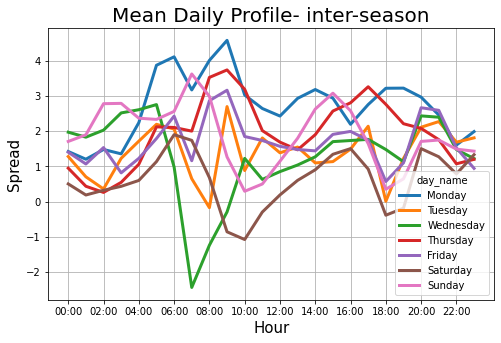

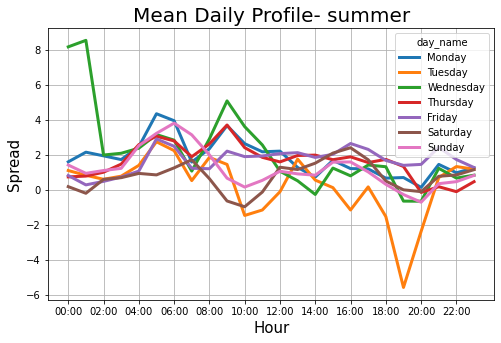

In [36]:
plot_daily_Comb(df_comb, seasonStr="winter")
plot_daily_Comb(df_comb, seasonStr="inter-season")
plot_daily_Comb(df_comb, seasonStr="summer")

In [37]:
SE1_Spot_2015 = EQ.timeseries.load(
   'SE1 Price Spot EUR/MWh NordPool H Actual',
   begin='2015-01-01',
   end='2015-12-31',
   frequency=Frequency.PT1H
)
SE1_Spot_2015 = SE1_Spot_2015.to_dataframe()
SE1_Spot_2015

,SE1 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2015-01-01 00:00:00+01:00,27.38
2015-01-01 01:00:00+01:00,23.37
2015-01-01 02:00:00+01:00,19.33
2015-01-01 03:00:00+01:00,17.66
2015-01-01 04:00:00+01:00,17.53
...,...
2015-12-30 19:00:00+01:00,16.04


In [38]:
SE1_Spot_2020 = EQ.timeseries.load(
   'SE1 Price Spot EUR/MWh NordPool H Actual',
   begin='2020-01-01',
   end='2020-12-31',
   frequency=Frequency.PT1H
)
SE1_Spot_2020 = SE1_Spot_2020.to_dataframe()
SE1_Spot_2020

,SE1 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2020-01-01 00:00:00+01:00,28.78
2020-01-01 01:00:00+01:00,28.45
2020-01-01 02:00:00+01:00,27.90
2020-01-01 03:00:00+01:00,27.52
2020-01-01 04:00:00+01:00,27.54
...,...
2020-12-30 19:00:00+01:00,20.36


In [39]:
SE1_Spot_2019 = EQ.timeseries.load(
   'SE1 Price Spot EUR/MWh NordPool H Actual',
   begin='2019-01-01',
   end='2019-12-31',
   frequency=Frequency.PT1H
)
SE1_Spot_2019 = SE1_Spot_2019.to_dataframe()
SE1_Spot_2019

,SE1 Price Spot EUR/MWh NordPool H Actual
,
,
date,
2019-01-01 00:00:00+01:00,28.32
2019-01-01 01:00:00+01:00,10.07
2019-01-01 02:00:00+01:00,10.03
2019-01-01 03:00:00+01:00,4.56
2019-01-01 04:00:00+01:00,4.83
...,...
2019-12-30 19:00:00+01:00,31.58


In [40]:
# SE1_Spot_2018 = EQ.timeseries.load(
#    'SE1 Price Spot EUR/MWh NordPool H Actual',
#    begin='2018-01-01',
#    end='2018-12-31',
#    frequency=Frequency.PT1H
# )
# SE1_Spot_2018 = SE1_Spot_2018.to_dataframe()
# SE1_Spot_2018

In [41]:
# SE1_Spot_2017 = EQ.timeseries.load(
#    'SE1 Price Spot EUR/MWh NordPool H Actual',
#    begin='2017-01-01',
#    end='2017-12-31',
#    frequency=Frequency.PT1H
# )
# SE1_Spot_2017 = SE1_Spot_2017.to_dataframe()
# SE1_Spot_2017

In [42]:
# SE1_Spot_2016 = EQ.timeseries.load(
#    'SE1 Price Spot EUR/MWh NordPool H Actual',
#    begin='2016-01-01',
#    end='2016-12-31',
#    frequency=Frequency.PT1H
# )
# SE1_Spot_2016 = SE1_Spot_2016.to_dataframe()
# SE1_Spot_2016

In [43]:
mean_2015_spot = SE1_Spot_2015.mean()
mean_2020_spot = SE1_Spot_2020.mean()
change_percent = ((float(mean_2020_spot)-mean_2015_spot)/mean_2015_spot)*100
print(change_percent)

SE1 Price Spot EUR/MWh NordPool H Actual       -32.217627
dtype: float64


In [44]:
mean_2019_spot = SE1_Spot_2019.mean()
change_percent_2019 = ((float(mean_2019_spot)-mean_2015_spot)/mean_2015_spot)*100
print(change_percent_2019)

SE1 Price Spot EUR/MWh NordPool H Actual        79.275317
dtype: float64


In [45]:
# mean_2018_spot = SE1_Spot_2018.mean()
# mean_2017_spot = SE1_Spot_2017.mean()
# mean_2016_spot = SE1_Spot_2016.mean()

In [46]:
# change_percent_2018 = ((float(mean_2018_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2018)
# change_percent_2017 = ((float(mean_2017_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2017)
# change_percent_2016 = ((float(mean_2016_spot)-mean_2015_spot)/mean_2015_spot)*100
# print(change_percent_2016)

In [47]:
SE1_Imb_2015 = EQ.timeseries.load(
   'SE1 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2015-01-01',
   end='2015-12-31',
   frequency=Frequency.PT1H
)
SE1_Imb_2015 = SE1_Imb_2015.to_dataframe()
SE1_Imb_2015

,SE1 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2015-01-01 00:00:00+01:00,21.36
2015-01-01 01:00:00+01:00,30.53
2015-01-01 02:00:00+01:00,30.53
2015-01-01 03:00:00+01:00,29.42
2015-01-01 04:00:00+01:00,28.86
...,...
2015-12-30 19:00:00+01:00,12.30


In [48]:
SE1_Imb_2020 = EQ.timeseries.load(
   'SE1 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2020-01-01',
   end='2020-12-31',
   frequency=Frequency.PT1H
)
SE1_Imb_2020 = SE1_Imb_2020.to_dataframe()
SE1_Imb_2020

,SE1 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2020-01-01 00:00:00+01:00,34.00
2020-01-01 01:00:00+01:00,34.00
2020-01-01 02:00:00+01:00,34.00
2020-01-01 03:00:00+01:00,34.00
2020-01-01 04:00:00+01:00,26.00
...,...
2020-12-30 19:00:00+01:00,20.36


In [49]:
SE1_Imb_2019 = EQ.timeseries.load(
   'SE1 Price Imbalance Consumption EUR/MWh H Actual',
   begin='2019-01-01',
   end='2019-12-31',
   frequency=Frequency.PT1H
)
SE1_Imb_2019 = SE1_Imb_2019.to_dataframe()
SE1_Imb_2019

,SE1 Price Imbalance Consumption EUR/MWh H Actual
,
,
date,
2019-01-01 00:00:00+01:00,28.32
2019-01-01 01:00:00+01:00,10.07
2019-01-01 02:00:00+01:00,10.03
2019-01-01 03:00:00+01:00,4.56
2019-01-01 04:00:00+01:00,4.83
...,...
2019-12-30 19:00:00+01:00,23.00


In [50]:
mean_2015_imb = SE1_Imb_2015.mean()
mean_2020_imb = SE1_Imb_2020.mean()
change_percent_imb = ((float(mean_2020_imb)-mean_2015_imb)/mean_2015_imb)*100
print(change_percent_imb)

SE1 Price Imbalance Consumption EUR/MWh H Actual       -37.348483
dtype: float64


In [51]:
mean_2019_imb = SE1_Imb_2019.mean()
change_percent_imb_2019 = ((float(mean_2019_imb)-mean_2015_imb)/mean_2015_imb)*100
print(change_percent_imb_2019)

SE1 Price Imbalance Consumption EUR/MWh H Actual        81.462353
dtype: float64
